In [1]:
import os
import torch as tr
import numpy as np
from matplotlib import pyplot as plt
import itertools

from sklearn.metrics.pairwise import cosine_similarity
import time

from utilsEM import *

%load_ext autoreload
%autoreload 2

In [2]:
tstamp = time.perf_counter_ns()

In [30]:
np.random.seed(77)
neps = 10 # 10 
tsteps = 45 # 45

argsD = {
  'smtemp':8,
  'stim_weight':0.05,
  'hrate':0.04
}
mtag = "-".join(["%s_%s"%(i,j) for i,j in argsD.items()])

acc,score = run_EMexp(neps,tsteps,argsD)

0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15

2 44
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14

5 42
5 43
5 44
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
5 32
5 33
5 34
5 35
5 36
5 37
5 38
5 39
5 40
5 41
5 42
5 43
5 44
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
5 32
5 33
5 34
5 35
5 36
5 37
5 38
5 39
5 40
5 41
5 42
5 43
5 44
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
5 32
5 33
5 34
5 35
5 36
5 37
5 38
5 39
5 40
5 41
5 42
5 43
5 44
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
5 32
5 33
5 34
5 35
5 36
5 37
5 38
5 39
5 40
5 41
5 42
5 43
5 44
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
5 32
5 33
5 34
5 35
5 36
5 37
5 38
5 39
5 40
5 41
5 42
5 43
5 44
5 6
5 7
5 8
5 9
5 10
5 11
5 12

8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 35
8 36
8 37
8 38
8 39
8 40
8 41
8 42
8 43
8 44
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 35
8 36
8 37
8 38
8 39
8 40
8 41
8 42
8 43
8 44
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 35
8 36
8 37
8 38
8 39
8 40
8 41
8 42
8 43
8 44
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 35
8 36
8 37
8 38
8 39
8 40
8 41
8 42
8 43
8 44
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 35
8 36
8 37
8 38
8 39
8 40
8 41
8 42
8 43
8 44
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 35


### performance metrics 

In [31]:
# Calculate d' based on hit rate and false alarm rate as in Kane et al
def calculate_dprime(hit_rate, fa_rate):
    """
    Calculates d' and sensitivity based on hit rate and false alarm rate.
    Returns dprime and sensitivity.
    """
    dl = np.log(hit_rate * (1 - fa_rate) / ((1 - hit_rate) * fa_rate))
    c = 0.5 * np.log((1 - hit_rate) * (1 - fa_rate) / (hit_rate * fa_rate))
    return dl, c

In [32]:
y1_responses = score[:,(0,1)]
y0_responses = score[:,(2,3)]

TP = np.sum(y1_responses == 1,2)
TN = np.sum(y0_responses == 1,2)
FP = np.sum(y1_responses == 0,2)
FN = np.sum(y0_responses == 0,2)

hit_rate = (TP + 0.5) / (TP + FN + 1)
false_alarm_rate = (FP + 0.5) / (FP + TN + 1)

In [33]:
hit_rate = np.concatenate(hit_rate)
false_alarm_rate = np.concatenate(false_alarm_rate)
correj = 1-false_alarm_rate

In [34]:
dprime_all,sens_all = paper_dprime(hit_rate,false_alarm_rate)

In [35]:
calc_stderr = lambda x: x.std(-1)/np.sqrt(neps)
hit_stderr = calc_stderr(hit_rate)
correj_stderr = calc_stderr(1-false_alarm_rate)
dprime_stderr = calc_stderr(dprime_all)
sens_stderr = calc_stderr(sens_all)

In [36]:
# 2back-target, 2back-lure, 3back-target, 3back-lure, ...
hits = np.mean(hit_rate,1)
correj = np.mean(correj,1)
dprime = np.zeros(len(hits))
bias = np.zeros(len(hits))
for i in range(len(hits)):
  dprime[i]=dprime_all.mean(-1)[i]
  bias[i]=sens_all.mean(-1)[i]

print(dprime.shape)

(8,)


In [48]:
score.shape # nback, sequence type, trial, epoch
import itertools
NB,SQ,TR,EP = score.shape
L = []
for nx,sx,tx,ex in itertools.product(np.arange(NB),np.arange(SQ),np.arange(TR),np.arange(EP)):
  L.append({
    'score':score[nx,sx,tx,ex],
    'nback':nx+2,
    'sequence_type':sx,
    "sequence_type_str":['CT', 'LT', 'CF', 'LF'][sx],
    'trial':tx,
    'epoch':ex,
  })
pd.DataFrame(L).to_csv('model_data/scores.csv')

In [37]:
## SAVEOUT
sv = lambda fname,d : np.save(f'model_data/{fname}',d)

D = {
  'TP':TP,
  'TN':TN,
  'FN':FN,
  'FP':FP,
  'score':score,
  'bias':bias,
  'hits':hits,
  'dprime':dprime,
  'correct_rejections':correj,
}
for k,v in D.items():
  sv(k,v)

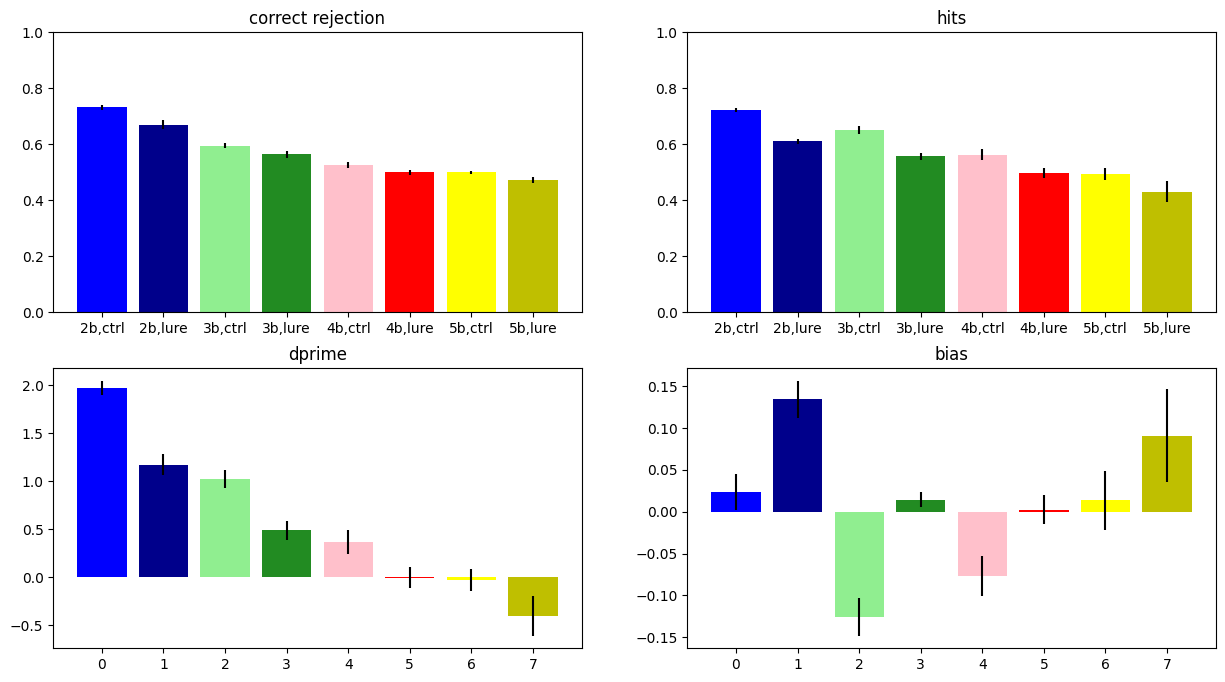

In [38]:
f,axar = plt.subplots(2,2,figsize=(15,8));axar=axar.reshape(-1)
cL = ['blue','darkblue','lightgreen','forestgreen','pink','r','yellow','y']
labL = ['2b,ctrl','2b,lure','3b,ctrl','3b,lure','4b,ctrl','4b,lure','5b,ctrl','5b,lure']


# correct reject
ax = axar[0]
ax.set_title('correct rejection')
ax.bar(range(len(labL)),correj,color=cL,yerr=correj_stderr)

# hits
ax = axar[1]
ax.set_title('hits')
ax.bar(range(len(labL)),hits,color=cL,yerr=hit_stderr)

# 
ax = axar[2]
ax.set_title('dprime')
ax.bar(range(len(labL)),dprime,color=cL,yerr=dprime_stderr)

#
ax = axar[3]
ax.set_title('bias')
ax.bar(range(len(labL)),bias,color=cL,yerr=sens_stderr)

## 
for ax in axar[:2]:
  ax.set_xticks(np.arange(len(labL)))
  ax.set_xticklabels(labL)
  ax.set_ylim(0,1)

plt.savefig('figures/EMmetrics-%s-t%i.jpg'%(mtag,tstamp))
plt.savefig('figures/EMmetrics_yerr-%s-t%i.svg'%(mtag,tstamp))